## import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Kmeans_assignment_data.csv", index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [4]:
df.isna().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [7]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

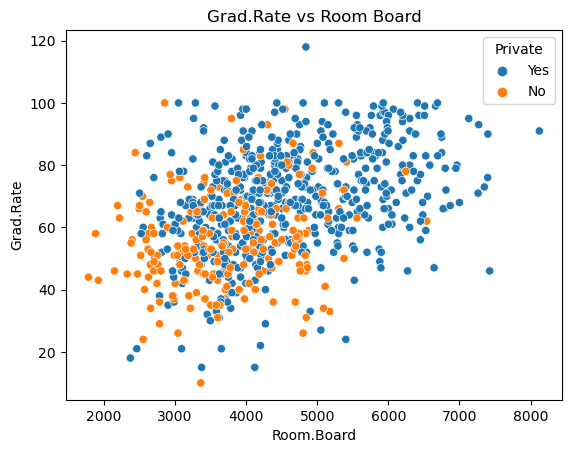

In [8]:
# Create a scatterplot of Grad.Rate versus Room Board
# Color the points by the Private column

sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=df)
plt.title('Grad.Rate vs Room Board')
plt.show()

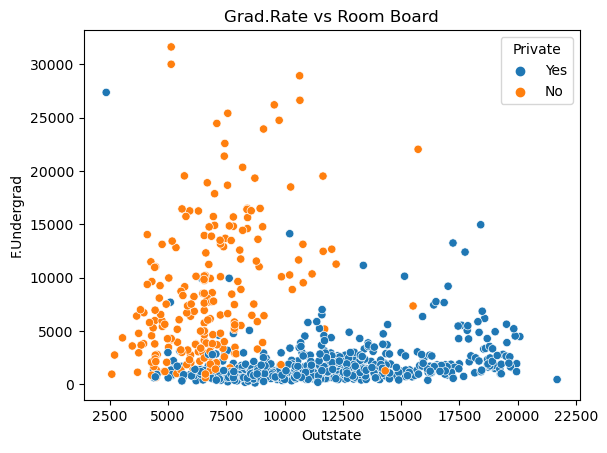

In [9]:
# Create a scatterplot of F.Undergrad versus Outstate
# Color the points by the Private column

sns.scatterplot(x='Outstate', y='F.Undergrad', hue='Private', data=df)
plt.title('Grad.Rate vs Room Board')
plt.show()

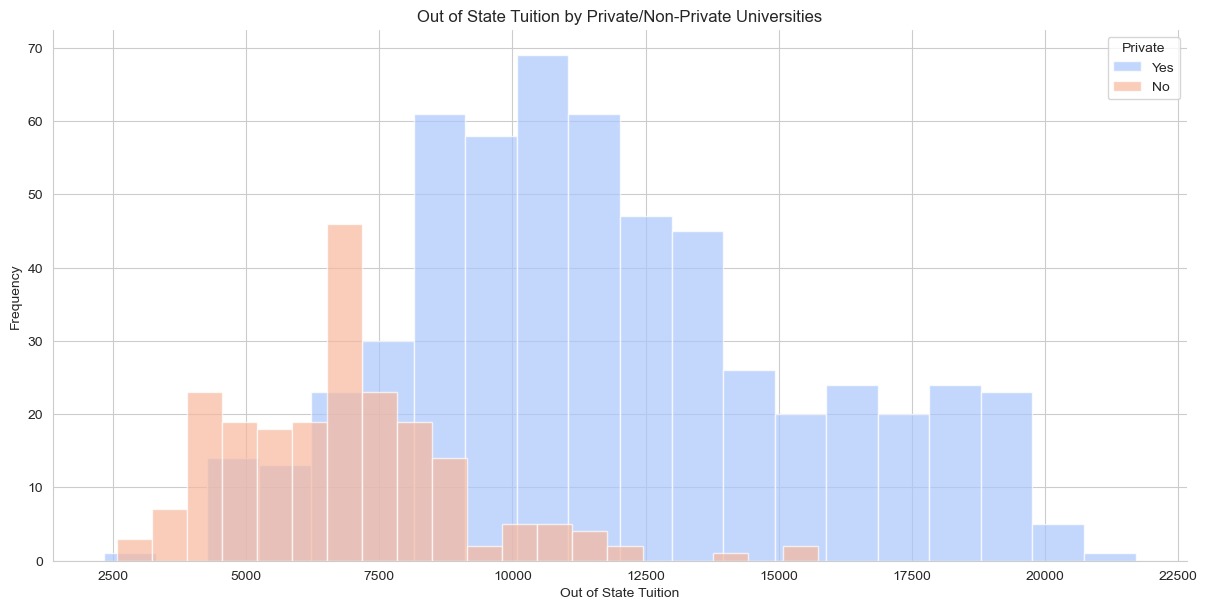

In [10]:
# Create a stacked histogram showing Out of State Tuition based on the Private column
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)
plt.title('Out of State Tuition by Private/Non-Private Universities')
plt.xlabel('Out of State Tuition')
plt.ylabel('Frequency')
plt.legend(title='Private')
plt.show()

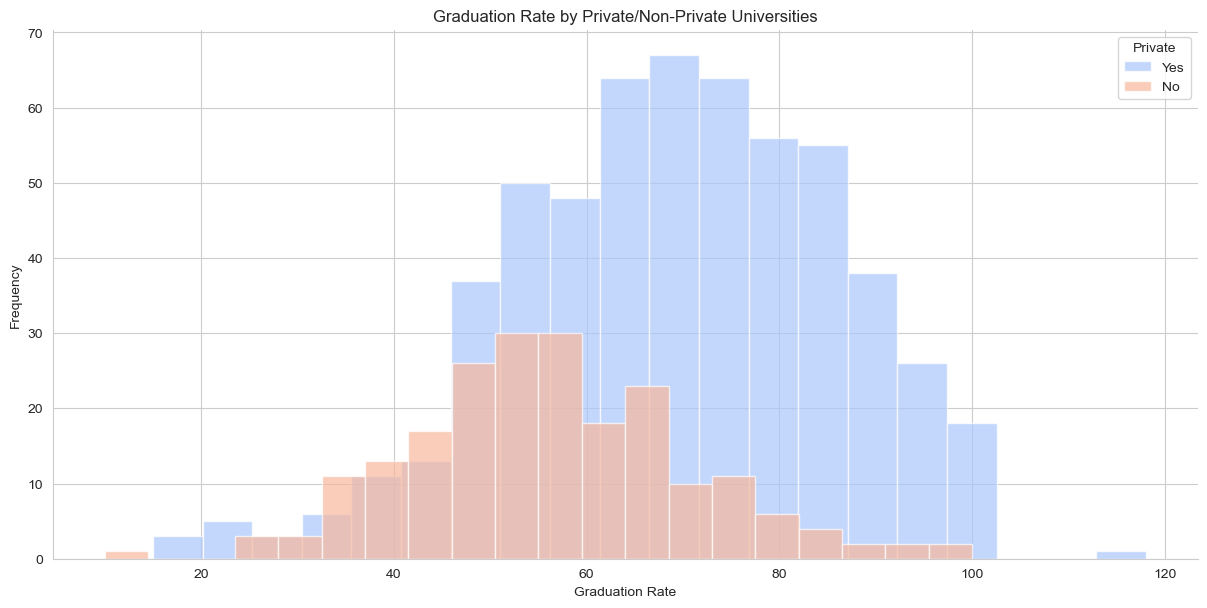

In [11]:
# Create a similar histogram for theGred.Rate column
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
plt.title('Graduation Rate by Private/Non-Private Universities')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.legend(title='Private')
plt.show()

In [12]:
# Find the name of the school with a graduation rate higher than 100%
school_name = df[df['Grad.Rate'] > 100].index[0]
print("Name of the school with a graduation rate higher than 100%:", school_name)

Name of the school with a graduation rate higher than 100%: Cazenovia College


In [13]:
# Set the graduation rate of that school to 95%
df.loc[school_name, 'Grad.Rate'] = 95

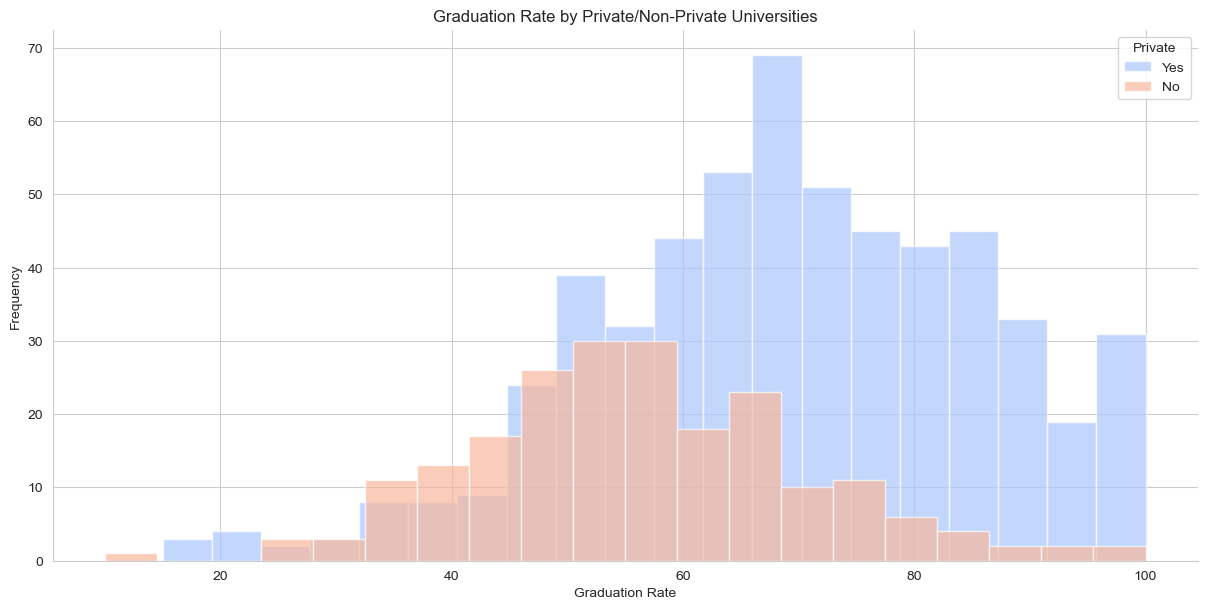

In [14]:
# Recheck the histogram visualization for Grad.Rate column to confirm the change
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
plt.title('Graduation Rate by Private/Non-Private Universities')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.legend(title='Private')
plt.show()

## K-Mean Clustering

In [15]:
scores_list = []
k_range = range(1,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k , random_state = 42)
    kmeans_model.fit(df.drop('Private' , axis=1))
    scores_list.append(kmeans_model.inertia_)

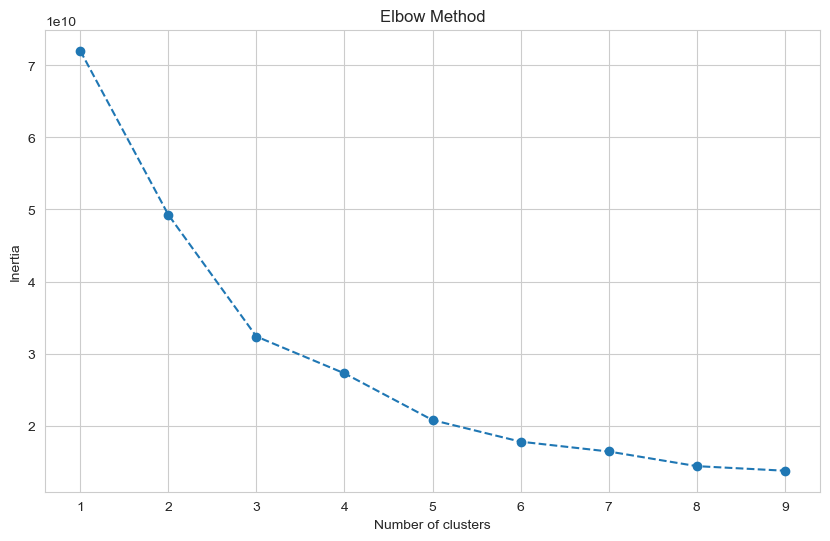

In [16]:
# plot the elbow method graph
plt.figure(figsize =(10,6))
plt.plot(k_range, scores_list , marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
scores = []
sillouette_scores = []
k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k, random_state = 42)
    y_pred = kmeans_model.fit_predict(df.drop('Private', axis=1))
    scores.append(kmeans_model.inertia_)
    sillouette_scores.append(silhouette_score(df.drop('Private', axis=1), y_pred))
    print("K = ", k, " : ",  kmeans_model.inertia_)
    print("Silhoutte Score : %0.4f" % silhouette_score(df.drop('Private', axis=1), y_pred))

K =  2  :  49266569122.3351
Silhoutte Score : 0.5366
K =  3  :  32365872589.10543
Silhoutte Score : 0.4759
K =  4  :  27248959522.02958
Silhoutte Score : 0.4230
K =  5  :  20767560870.164368
Silhoutte Score : 0.4001
K =  6  :  17765360270.735783
Silhoutte Score : 0.3079
K =  7  :  16403095594.856686
Silhoutte Score : 0.3084
K =  8  :  14369882430.089502
Silhoutte Score : 0.3065
K =  9  :  13733551245.456654
Silhoutte Score : 0.3059


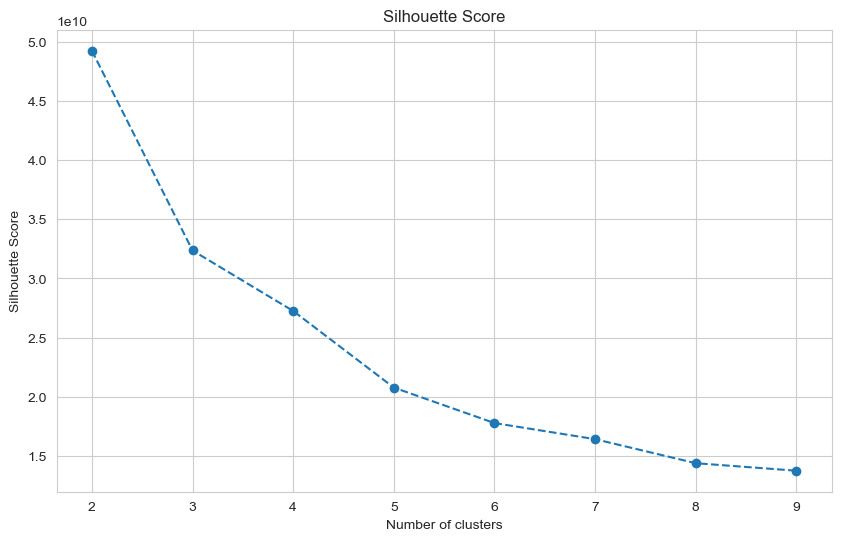

In [18]:
# plot silhouette score
plt.figure(figsize=(10,6))
plt.plot(k_range , scores , marker ='o' , linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [32]:
# Fit the KMeans model with the best number of clusters
best_k = scores.index(max(scores)) + 2  # Adding 2 because range starts from 2
kmeans_model = KMeans(n_clusters=best_k, random_state=42)
kmeans_model.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2, random_state=42)

In [33]:
df['Cluster'] = y_pred
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [34]:
kmeans_model.cluster_centers_

array([[1.99097222e+03, 1.34700585e+03, 5.01001462e+02, 2.66637427e+01,
        5.46023392e+01, 2.19326316e+03, 5.53080409e+02, 1.06887091e+04,
        4.37517398e+03, 5.44059942e+02, 1.26739474e+03, 7.10745614e+01,
        7.83391813e+01, 1.38330409e+01, 2.35716374e+01, 9.58258772e+03,
        6.58742690e+01, 1.24900090e-16],
       [1.04349247e+04, 6.95977419e+03, 2.83176344e+03, 3.41397849e+01,
        6.45806452e+01, 1.47810323e+04, 3.07806452e+03, 8.61637634e+03,
        4.22773118e+03, 5.88516129e+02, 1.87936559e+03, 8.43225806e+01,
        8.97311828e+01, 1.59774194e+01, 1.66559140e+01, 1.02307849e+04,
        6.21935484e+01, 1.00000000e+00]])

In [36]:
# Print predictions
predictions = kmeans_model.predict(df.drop('Private', axis=1))
print("Predictions:")
print(predictions)


Predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0

In [37]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]

In [39]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pcs = pca.fit_transform(df.drop('Private', axis=1))

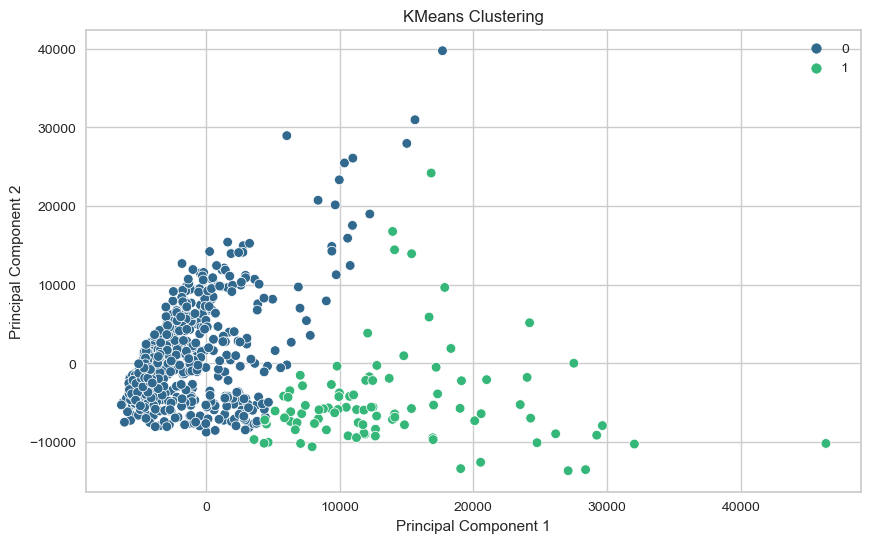

In [41]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pcs[:,0], y=df_pcs[:,1], hue=predictions, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Evaluation

In [43]:
# Create a new column 'Cluster' based on the KMeans predictions
df['Cluster']= np.where(predictions == 1,1,0)

# Evaluate the clustering performance
accuracy = np.mean(df['Cluster'] == (df['Private'] == 'Yes').astype(int))

# print the accuracy
print("Clustering Accuracy" , accuracy)

Clustering Accuracy 0.18404118404118405


In [44]:
# Create a new column 'Cluster' based on the 'Private' column
df['Cluster'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the DataFrame to verify the changes
print(df.head())

                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Ch